<a href="https://colab.research.google.com/github/salma-abed/Deep-learning-based-automated-detection-and-classification-of-Alzheimer-s-disease-Using-Neuroimaging/blob/main/multi_layer_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nibabel as nib
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from shutil import copyfile
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from tensorflow import keras
import pandas as pd
from google.colab import drive
import shutil
import tensorflow as tf

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/ADNI_Dataset_jpg'
train_path = '/content/drive/MyDrive/ADNI_Dataset_jpg/train'
test_path = '/content/drive/MyDrive/ADNI_Dataset_jpg/test'
label_names = ['AD', 'CN', 'LMCI', 'MCI']

In [ ]:
class MultilayerPerceptronModel:
    def __init__(self, train_path, test_path, label_names, train_data=None, test_data=None):
        # Initialize the object's data members
        self.train_path = train_path
        self.test_path = test_path
        self.label_names = label_names
        self.train_data = train_data
        self.test_data = test_data
        self.model = None
        
    def build_model(self):
        # Define the Multilayer Perceptron model architecture
        self.model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(len(self.label_names), activation='softmax')
        ])
        
    def prepare_data(self):
        # Define the data generators for training and testing
        train_datagen = ImageDataGenerator(rescale=1.0 / 255)    # rescale pixel values to [0, 1] for training data
        test_datagen = ImageDataGenerator(rescale=1.0 / 255)     # rescale pixel values to [0, 1] for testing data
        
        # Set up the training data generator
        train_generator = train_datagen.flow_from_directory(
            directory=self.train_path,           # directory containing the training data
            classes=self.label_names,            # list of label names for the dataset
            batch_size=32,                       # batch size for training
            shuffle=True,                        # shuffle the training data after each epoch
            seed=42,                             # set the random seed for shuffling the training data
            target_size=(224, 224),              # resize input images to 224x224 pixels
        )
        
        # Set up the testing data generator
        test_generator = test_datagen.flow_from_directory(
            directory=self.test_path,            # directory containing the testing data
            classes=self.label_names,            # list of label names for the dataset
            batch_size=32,                       # batch size for testing
            shuffle=True,                        # shuffle the testing data after each epoch
            seed=42,                             # set the random seed for shuffling the testing data
            target_size=(224, 224),              # resize input images to 224x224 pixels
        )
        
        # Assign the data generators to the training and testing sets
        self.train_data = train_generator
        self.test_data = test_generator
        
    def train_model(self, epochs=10, optimizer='adam'):
        # Compile the model with an optimizer, loss function, and evaluation metric
        self.model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
        # Train the model using the training data generator
        self.model.fit(self.train_data, epochs=epochs)
        
    def evaluate_model(self):
        # Evaluate the model on the testing data generator
        loss, acc = self.model.evaluate(self.test_data)
        print(f"Test accuracy: {acc:.2f}")
        
    def predict(self, image_path):
        # Load the image from the specified file path and resize it to 224x224 pixels
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        
        # Convert the image to a numpy array and add a batch dimension
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        
    def display_summary(self):
      if self.model is None:
          print("Model has not been built yet. Please call build_model() first.")
      else:
          self.model.summary()

In [ ]:
# Create an instance of the ResNet50Model class
model = MultilayerPerceptronModel(train_path=train_path, test_path=test_path, label_names=label_names)

# Build the model architecture
model.build_model()

# Prepare the data generators
model.prepare_data()

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [ ]:
model.display_summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 19,268,228
Trainable params: 19,268,228
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
model.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.model.fit(model.train_data, epochs=10)

Epoch 1/10
100/100 [==============================] - 656s 7s/step - loss: 12.2734 - accuracy: 0.3122
Epoch 2/10
100/100 [==============================] - 54s 530ms/step - loss: 1.3606 - accuracy: 0.2491
Epoch 3/10
100/100 [==============================] - 53s 531ms/step - loss: 1.3543 - accuracy: 0.2887
Epoch 4/10
100/100 [==============================] - 52s 520ms/step - loss: 1.3503 - accuracy: 0.2909
Epoch 5/10
100/100 [==============================] - 55s 547ms/step - loss: 1.3424 - accuracy: 0.2966
Epoch 6/10
100/100 [==============================] - 64s 640ms/step - loss: 1.3386 - accuracy: 0.3034
Epoch 7/10
100/100 [==============================] - 56s 560ms/step - loss: 1.3426 - accuracy: 0.2988
Epoch 8/10
100/100 [==============================] - 54s 538ms/step - loss: 1.3401 - accuracy: 0.3006
Epoch 9/10
100/100 [==============================] - 57s 568ms/step - loss: 1.3358 - accuracy: 0.3016
Epoch 10/10
100/100 [==============================] - 54s 536ms/step - lo

In [ ]:
model.evaluate_model()

25/25 [==============================] - 157s 7s/step - loss: 1.3510 - accuracy: 0.2875
Test accuracy: 0.29


25/25 [==============================] - 5s 188ms/step


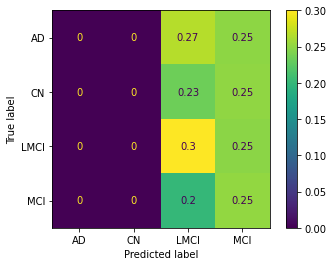

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get predicted labels
y_pred_probs = model.model.predict(model.test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
labels = ["AD", "CN", "LMCI","MCI"]
y_test = model.test_data.labels
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_pred , normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix= result, display_labels= labels)
disp.plot()